In [1]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout,Conv2D,MaxPool2D,Flatten,Dense,Activation,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
from sklearn.metrics import classification_report,confusion_matrix

In [19]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

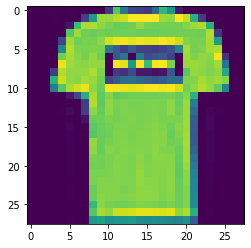

In [3]:
plt.imshow(train_images[1])

In [4]:
IMG_ROWS=28
IMG_COLS=28
NUM = train_images.shape[0]
NUM_TEST = test_images.shape[0]
IMAGE_SHAPE = (IMG_ROWS,IMG_COLS,1)

In [21]:
train_labels = tf.keras.utils.to_categorical(train_labels,10)
train_images = train_images.reshape(NUM,*IMAGE_SHAPE)
train_images = train_images/255

In [20]:

test_images = test_images.reshape(NUM_TEST,*IMAGE_SHAPE)
test_images = test_images/255

In [7]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=IMAGE_SHAPE))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax')) 

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [8]:
early = EarlyStopping(patience=10)
red = ReduceLROnPlateau(monitor='val_loss',patience=2,verbose=1,factor=0.5,min_lr=0.00001)
callbacks = [early,red]
epochs=8

In [9]:
history = model.fit(
    train_images,train_labels,
    epochs=epochs,
    validation_split=0.2,
    batch_size=128,
    callbacks=callbacks
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/8
48000/48000 [==============================] - 95s 2ms/sample - loss: 0.4738 - accuracy: 0.8353 - val_loss: 0.3410 - val_accuracy: 0.8791
Epoch 2/8
48000/48000 [==============================] - 102s 2ms/sample - loss: 0.3190 - accuracy: 0.8871 - val_loss: 0.2995 - val_accuracy: 0.8928
Epoch 3/8
48000/48000 [==============================] - 100s 2ms/sample - loss: 0.2788 - accuracy: 0.9004 - val_loss: 0.2760 - val_accuracy: 0.9031
Epoch 4/8
48000/48000 [==============================] - 108s 2ms/sample - loss: 0.2525 - accuracy: 0.9097 - val_loss: 0.2653 - val_accuracy: 0.9038
Epoch 5/8
48000/48000 [==============================] - 107s 2ms/sample - loss: 0.2314 - accuracy: 0.9151 - val_loss: 0.2529 - val_accuracy: 0.9082
Epoch 6/8
48000/48000 [==============================] - 110s 2ms/sample - loss: 0.2104 - accuracy: 0.9232 - val_loss: 0.2504 - val_accuracy: 0.9081
Epoch 7/8
48000/48000 [==============================] - 

In [ ]:
a = {'accuracy':history.history['accuracy'],'val_accuracy':history.history['val_accuracy']}
sns.scatterplot(x = range(1,9),y = a['accuracy'],label='accuracy')
sns.scatterplot(x = range(1,9),y = a['val_accuracy'],label='val_accuracy',color='red')

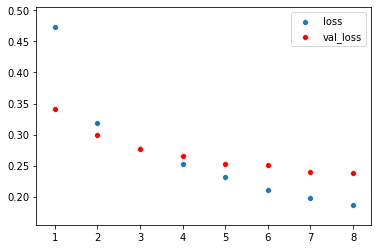

In [13]:
a = {'loss':history.history['loss'],'val_loss':history.history['val_loss']}
sns.scatterplot(x = range(1,9),y = a['loss'],label='loss')
sns.scatterplot(x = range(1,9),y = a['val_loss'],label='val_loss',color='red')

In [22]:
predicted_classes = model.predict_classes(test_images)
correct = np.nonzero(predicted_classes==test_labels)[0]
incorrect = np.nonzero(predicted_classes!=test_labels)[0]
target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(test_labels, predicted_classes, target_names=target_names))

precision    recall  f1-score   support

     Class 0       0.80      0.91      0.85      1000
     Class 1       0.98      0.99      0.98      1000
     Class 2       0.89      0.84      0.86      1000
     Class 3       0.93      0.91      0.92      1000
     Class 4       0.87      0.86      0.86      1000
     Class 5       0.98      0.98      0.98      1000
     Class 6       0.75      0.70      0.72      1000
     Class 7       0.95      0.96      0.96      1000
     Class 8       0.98      0.97      0.98      1000
     Class 9       0.96      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



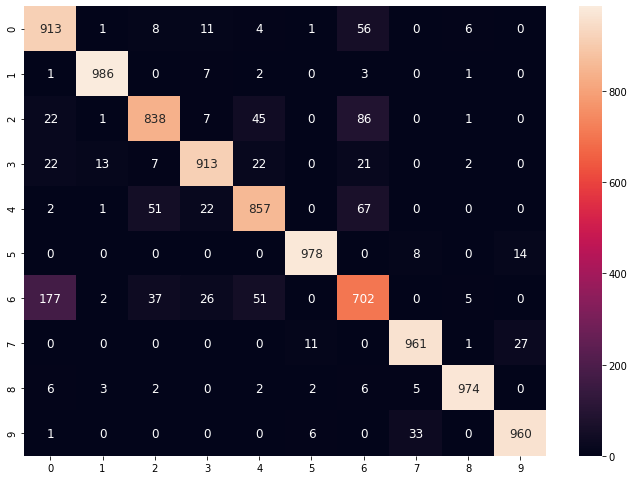

In [23]:
conf = confusion_matrix(test_labels,predicted_classes)
df_cm = pd.DataFrame(conf, range(10), range(10))

fig, ax = plt.subplots()
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12},fmt='g')
fig.set_size_inches(11.7, 8.27)

In [24]:
test_labels = tf.keras.utils.to_categorical(test_labels,10)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 11s 1ms/sample - loss: 0.2542 - accuracy: 0.9082
test_acc: 0.9082
